In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Load_Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Date_CleanUp
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\user\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\user\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Tue Jun 10 20:06:45 2025).


In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns

In [4]:
# Data Scientist Jobs In UK

df_DS_UK = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United Kingdom')].copy()

# Drop NaN values from the salary year avg column for accurate visualization
df_DS_UK = df_DS_UK.dropna(subset=['salary_year_avg'])

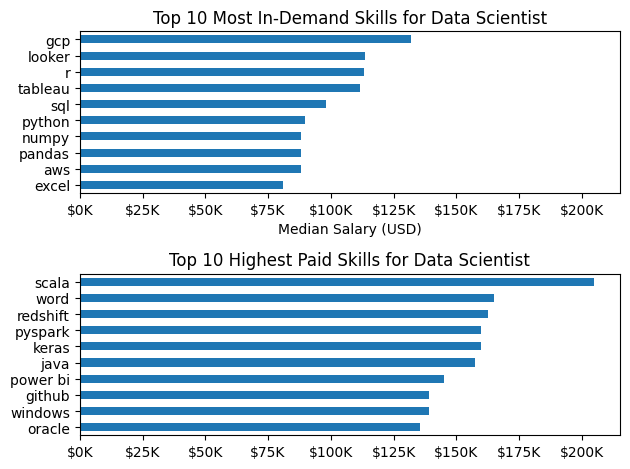

In [5]:
df_DS_UK = df_DS_UK.explode('job_skills')

df_DS_UK = df_DS_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DS_top_pay = df_DS_UK.sort_values(by='median', ascending=False).head(10).sort_values(by='median', ascending=True)
df_DS_skills = df_DS_UK.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=True)

fig, ax = plt.subplots(2,1)

#Top Highest Paid Skills for Data Scientist
df_DS_top_pay.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Highest Paid Skills for Data Scientist')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
#[::-1]

#Top 10 Most IN-Demand Skills for Data Scientist
df_DS_skills.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Most In-Demand Skills for Data Scientist')
ax[0].set_ylabel('')
ax[0].set_xlabel('Median Salary (USD)')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].set_xlim(ax[1].get_xlim())

fig.tight_layout()


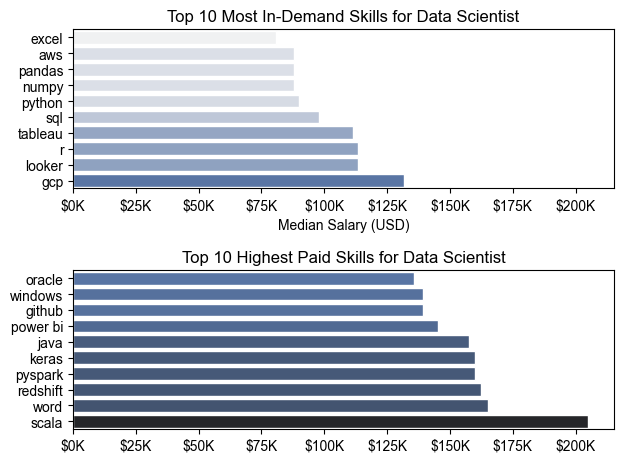

In [9]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')

#Top Highest Paid Skills for Data Scientist
sns.barplot(data=df_DS_top_pay, x='median', y=df_DS_top_pay.index, ax=ax[1], hue='median', palette='dark:b_r')
ax[1].legend().remove()
# df_DS_top_pay.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Highest Paid Skills for Data Scientist')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
#[::-1]

#Top 10 Most IN-Demand Skills for Data Scientist
sns.barplot(data=df_DS_skills, x='median', y=df_DS_skills.index, ax=ax[0], hue='median', palette='light:b')
ax[0].legend().remove()

# df_DS_skills.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Most In-Demand Skills for Data Scientist')
ax[0].set_ylabel('')
ax[0].set_xlabel('Median Salary (USD)')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].set_xlim(ax[1].get_xlim())

fig.tight_layout()

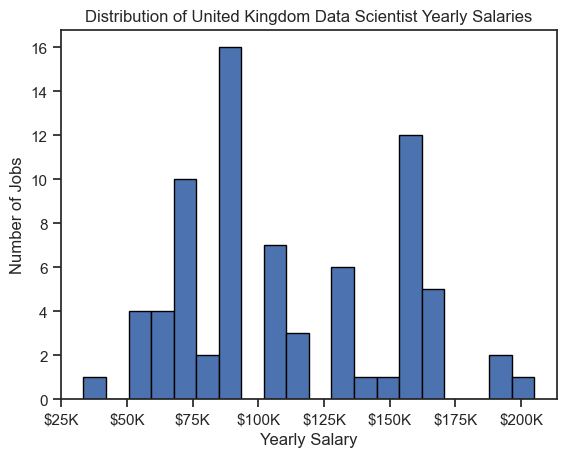

In [14]:
# Data Scientist Jobs In UK

df_DS_UK = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United Kingdom')].copy()

df_DS_UK

df_DS_UK['salary_year_avg'].plot(kind='hist', bins=20, edgecolor='black')
#Dont need plt.xlim(x limit) for this one

plt.title('Distribution of United Kingdom Data Scientist Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

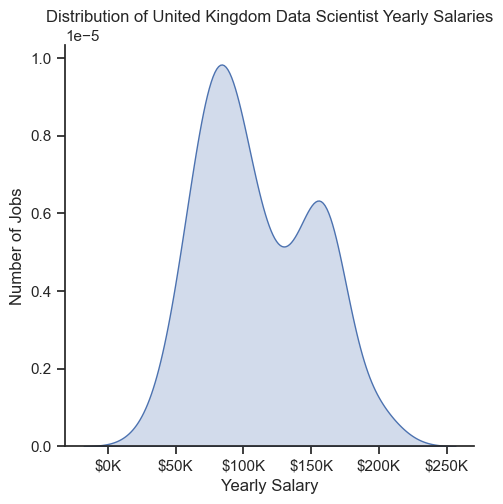

In [15]:
sns.displot(df_DS_UK['salary_year_avg'], kind='kde', fill=True)

plt.title('Distribution of United Kingdom Data Scientist Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

C:\Users\user\AppData\Local\Temp\ipykernel_23092\4211704635.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


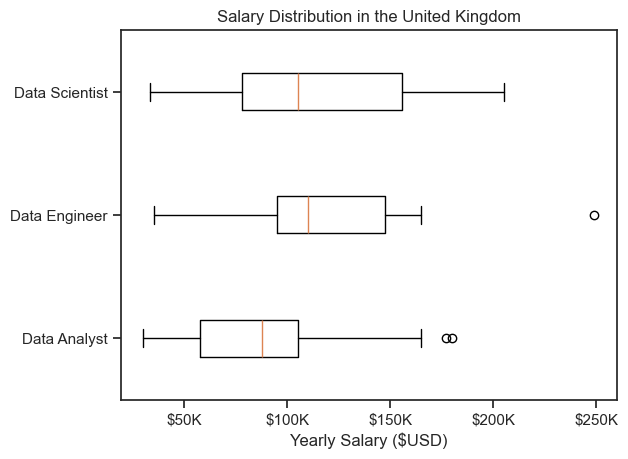

In [21]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

#filtering for jobs in job_title in UK
df_UK = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United Kingdom')].copy()

df_UK = df_UK.dropna(subset=['salary_year_avg'])

job_list = [df_UK[df_UK['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United Kingdom')
plt.xlabel('Yearly Salary ($USD)')
tick_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(tick_x)



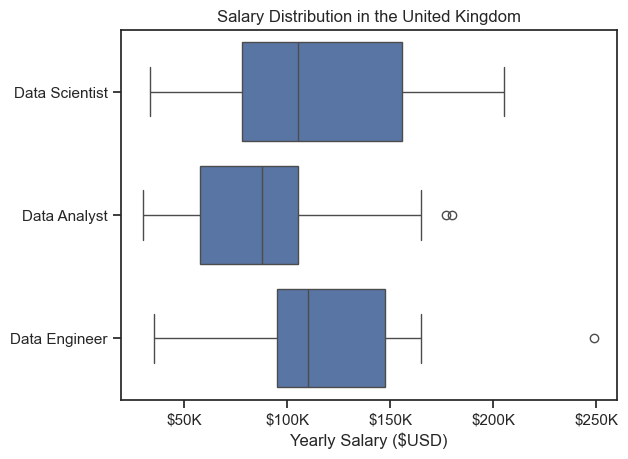

In [22]:
sns.boxplot(data=df_UK, x='salary_year_avg', y='job_title_short')


plt.title('Salary Distribution in the United Kingdom')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
tick_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(tick_x)